In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as sp
import copy
import os
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [28]:
directory = os.getcwd()
df = pd.read_csv(directory+"/results.csv")
#todo look at deadline overtime

In [63]:

#Time_best = {}
Computation_time = {}
Computation_time['UH'] = {}
Computation_time['UH']['Micro']={}
Computation_time['UH']['Meso']={}
Computation_time['UH']['Macro']={}
Computation_time['Random'] = {}
Computation_time['Random']['Micro']={}
Computation_time['Random']['Meso']={}
Computation_time['Random']['Macro']={}
Computation_time['Braess'] = {}
Computation_time['Braess']['Micro']={}
Computation_time['Braess']['Meso']={}
Computation_time['Braess']['Macro']={}

maps = {'UH':'4corners_neighborhoods.net.xml-test-',
       'Random':'Random_English.net.xml-test_R-',
       'Braess':'Braess_Homebrew_fixed1.net.xml-test-'}
for m in maps.keys():
    base_name=maps[m]
    for x in range(0,5):
        Computation_time[m]['Micro'][x]=0
        Computation_time[m]['Meso'][x]=0
        Computation_time[m]['Macro'][x]=[]
        for y in range(0,30):
            temp_name = base_name + str(x) + "-Iteration-"+str(y)
            #print(temp_name)
            #print(df['Deadline Misses'].loc[(df['Version']=='DUE.9.5')&(df['Round_name']==temp_name)])
            if y == 0:
                
                c1 = df['Time'].loc[(df['Version']=='Micro-DUE.9.5')&(df['Round_name']==temp_name)].item()
                Computation_time[m]['Micro'][x]=c1
                c1 = df['Time'].loc[(df['Version']=='Meso-DUE.9.5')&(df['Round_name']==temp_name)].item()
                Computation_time[m]['Meso'][x]=c1
            c1 = df['Time'].loc[(df['Version']=='Macro-DUE.9.5')&(df['Round_name']==temp_name)].item()
            Computation_time[m]['Macro'][x].append(c1)

#         temp_name =base_name + str(x)
#         print(temp_name)
#         print(df['Deadline Misses'].loc[(df['Version']=='base_SUMO_Duarouter')&(df['Round_name']==temp_name)].tolist())
#         dijk[x] = df['Deadline Misses'].loc[(df['Version']=='base_SUMO_Duarouter')&(df['Round_name']==temp_name)].item()
#         dijk_tt_avg+=df['Average_travel_Time'].loc[(df['Version']=='base_SUMO_Duarouter')&(df['Round_name']==temp_name)].item()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

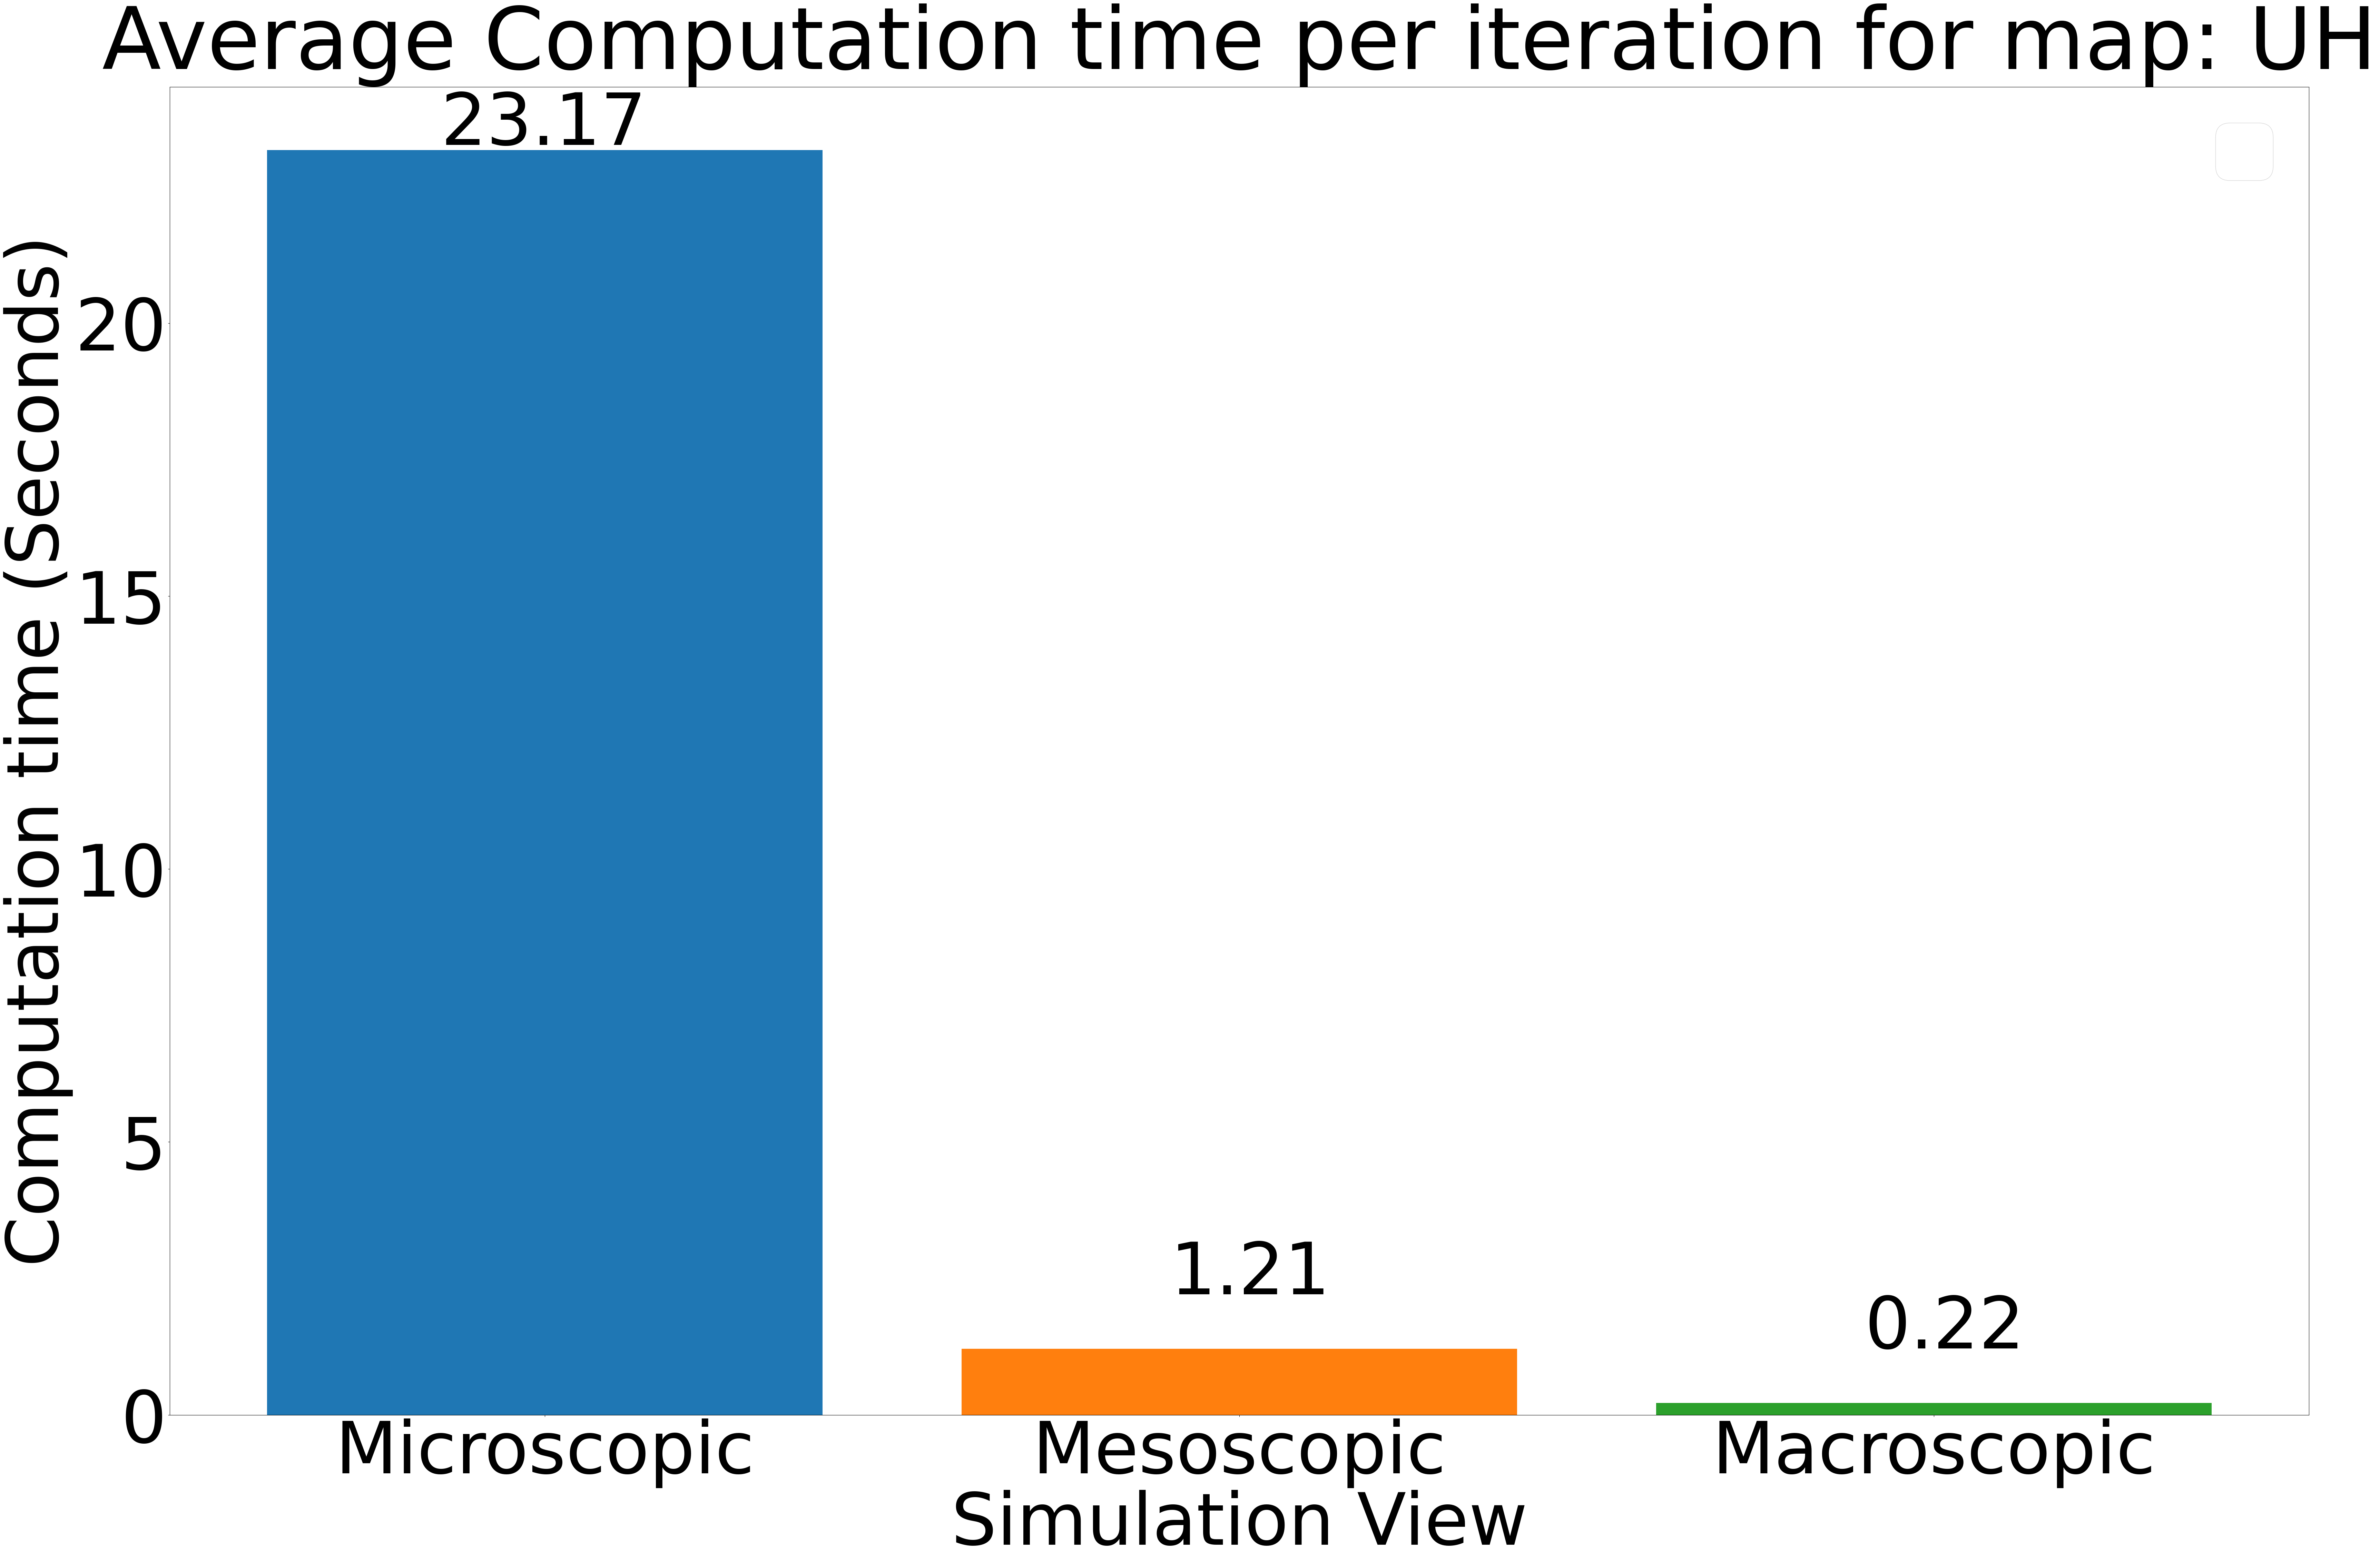

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

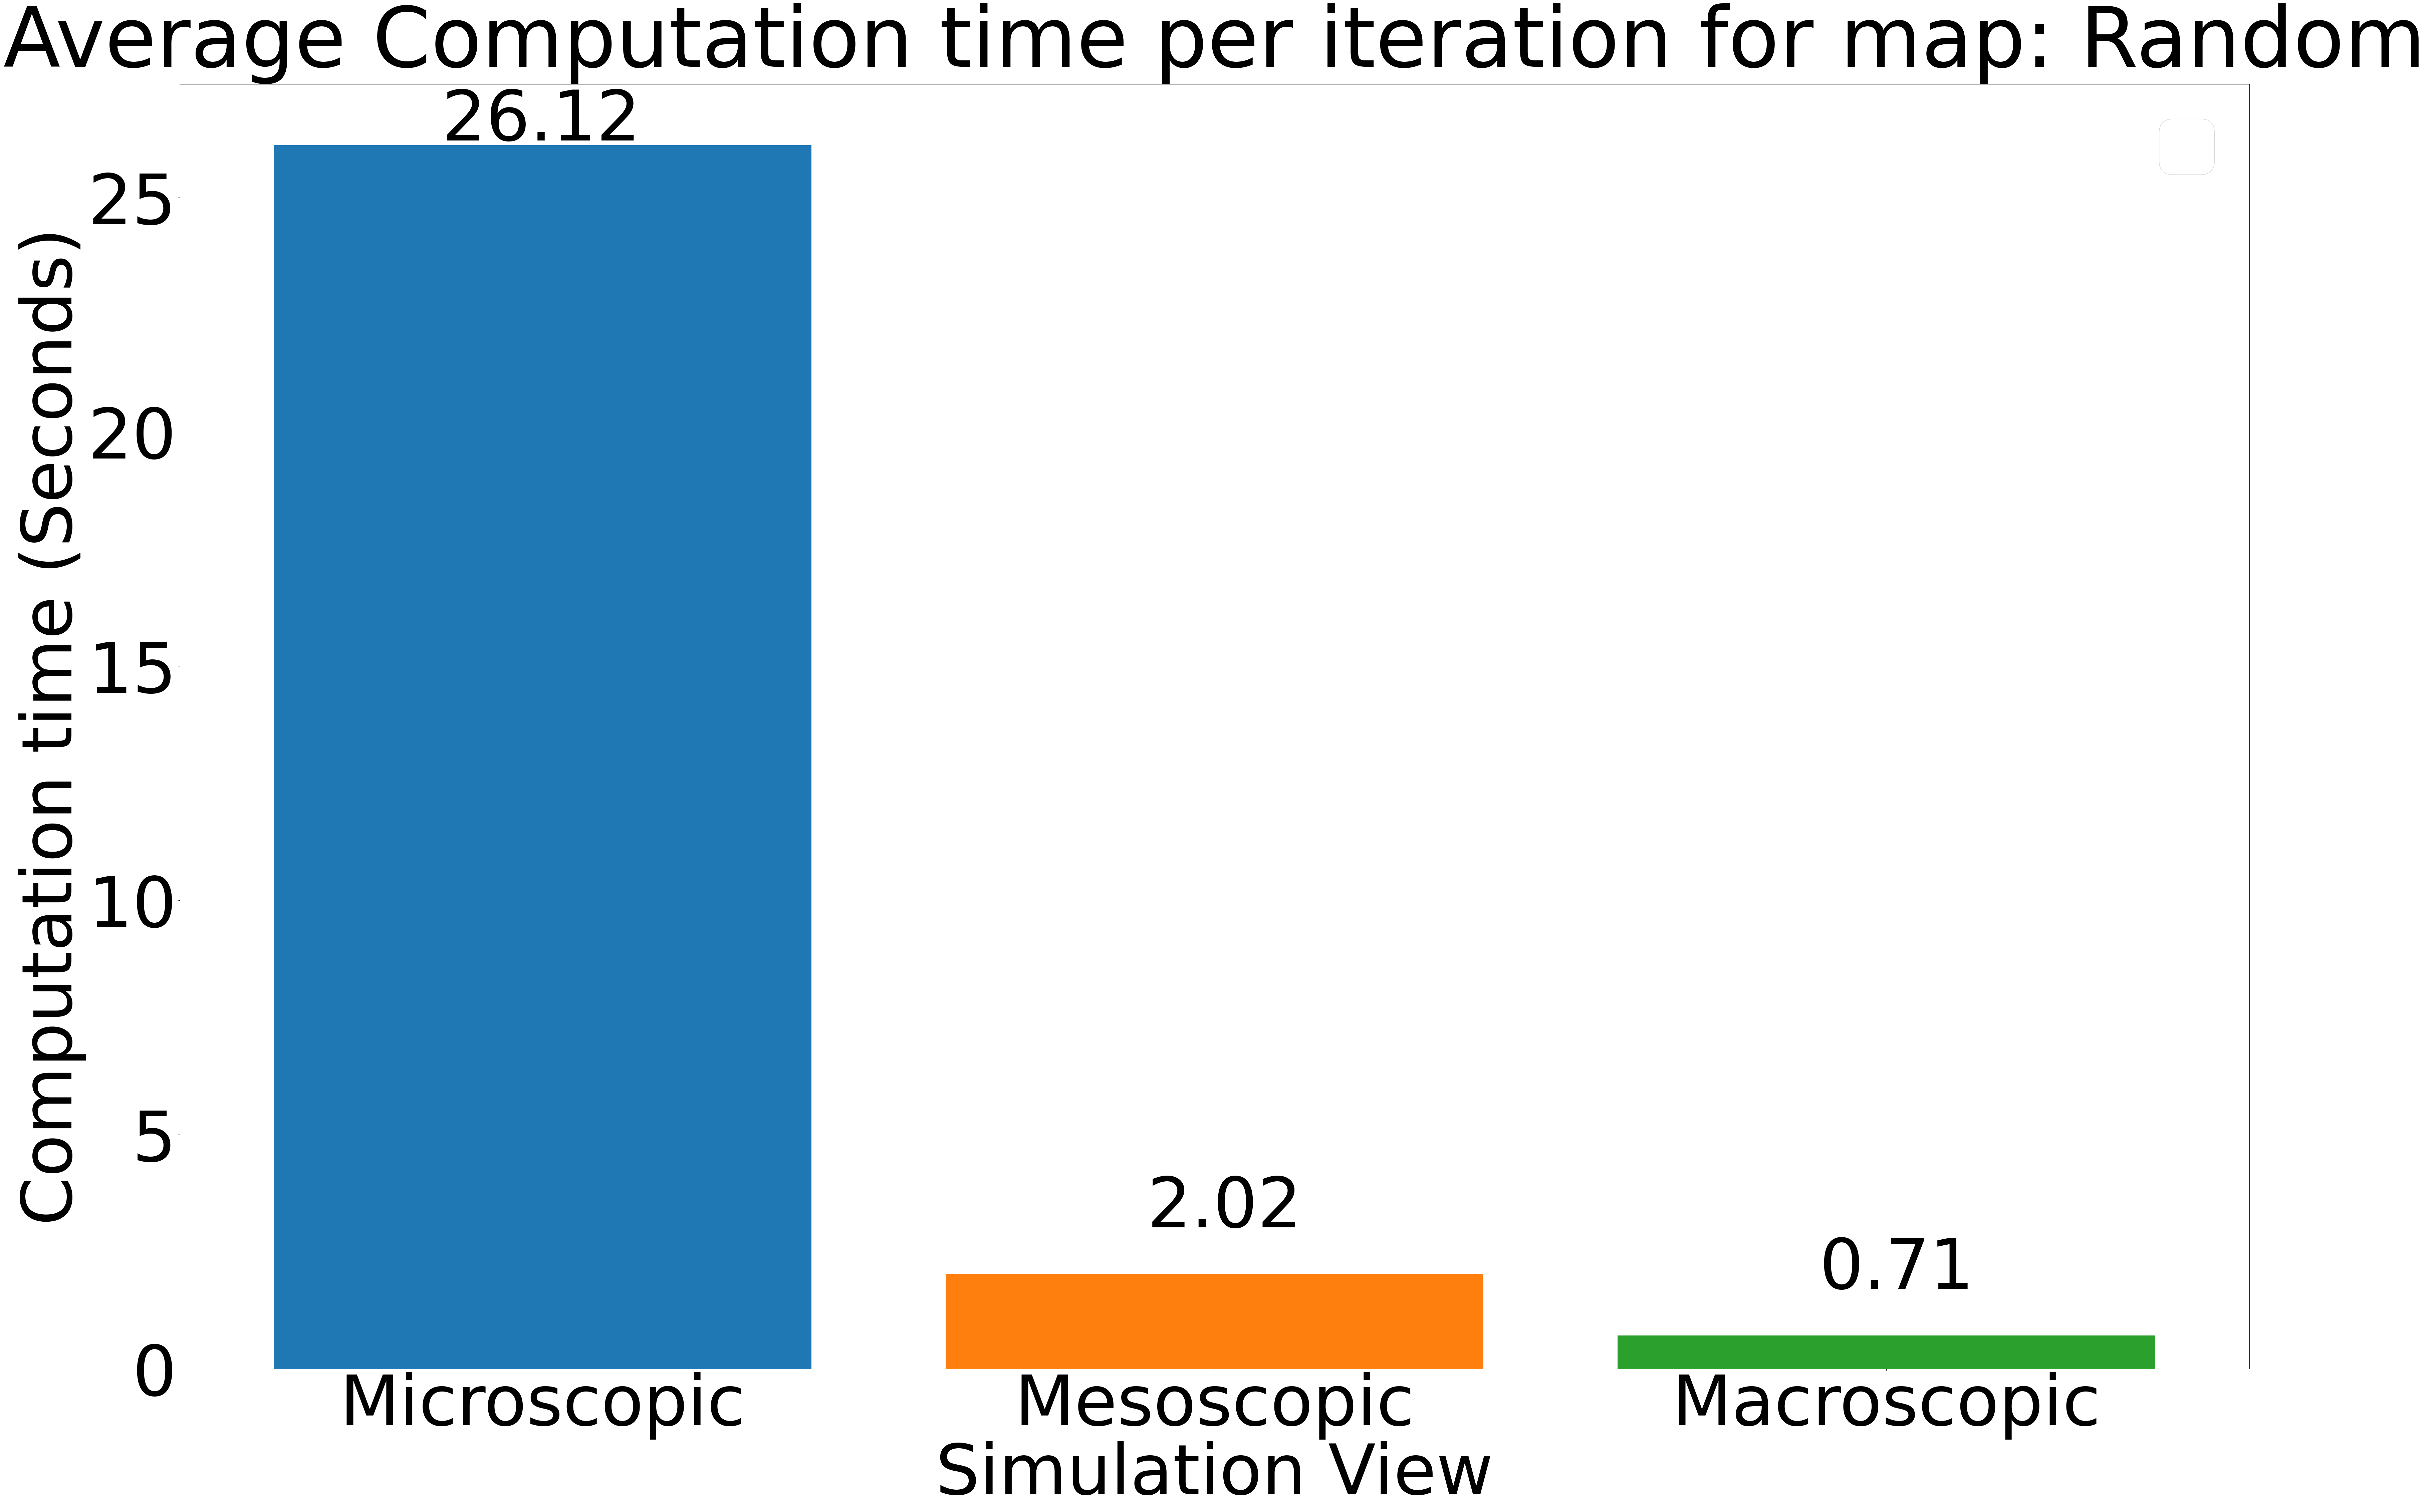

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

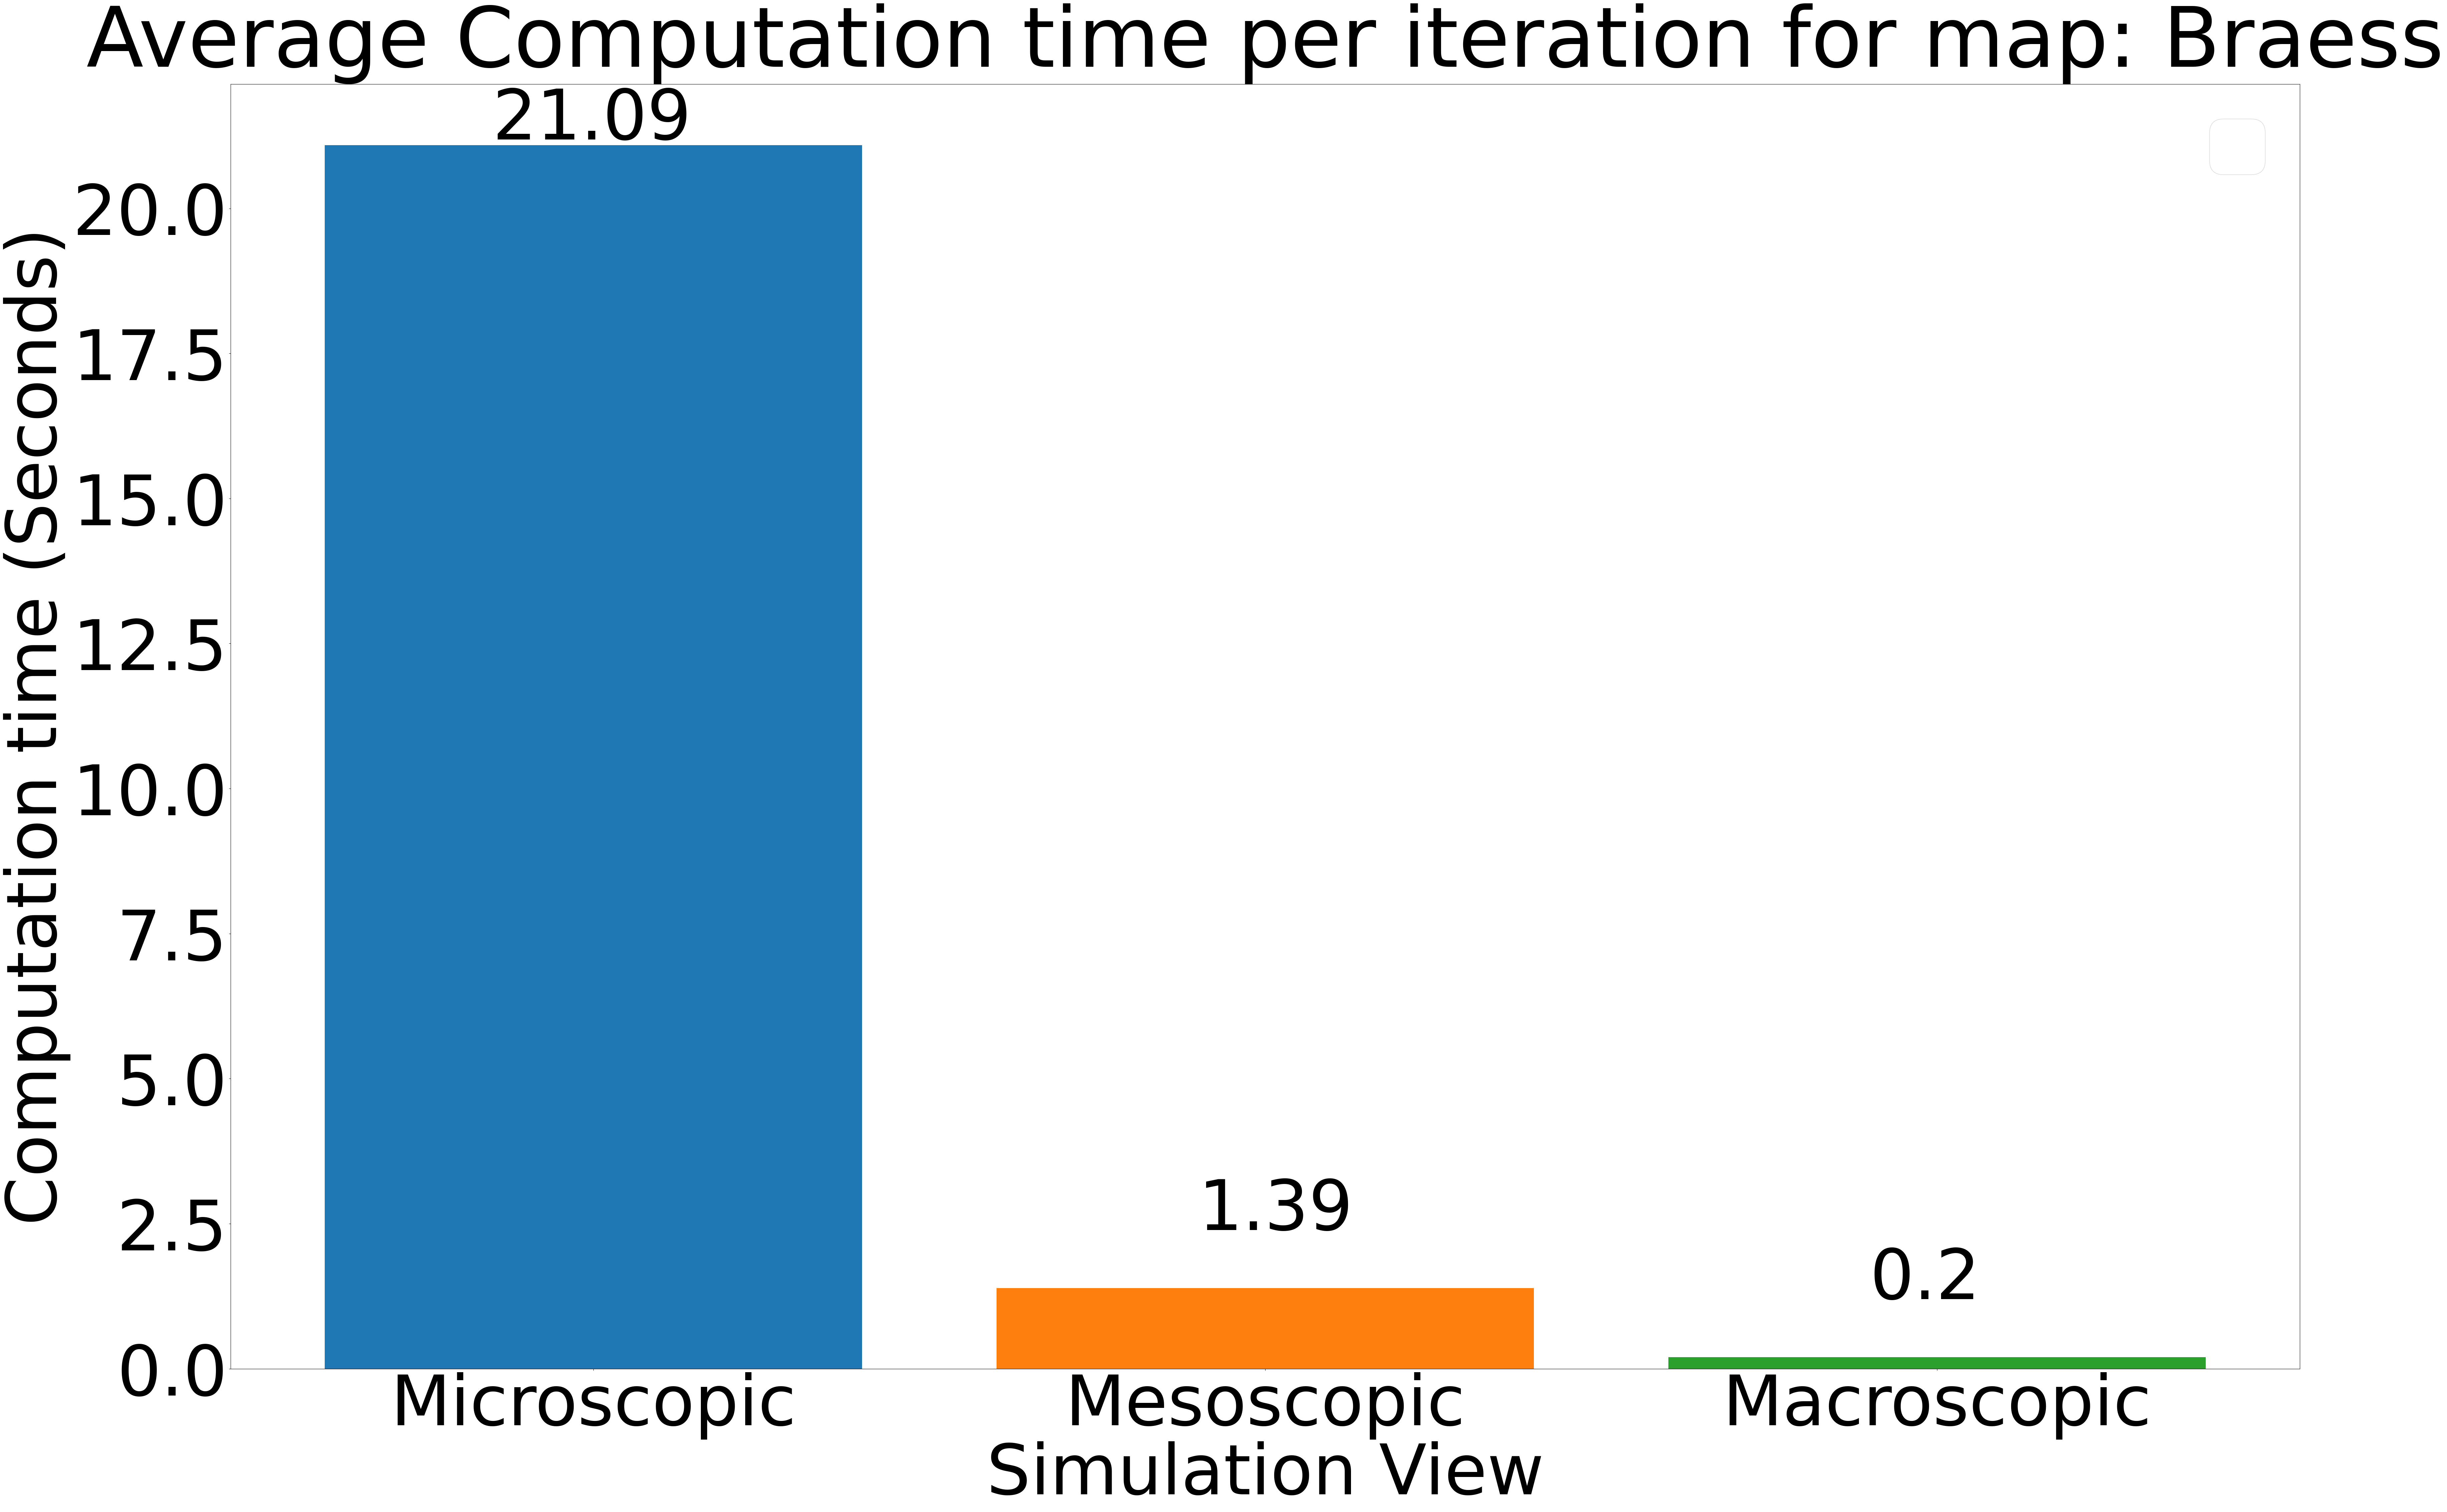

In [64]:
for m in maps.keys():
    base_name=maps[m]
    micro_t = 0
    meso_t = 0
    macro_t = 0
    for x in range(0,5):
        plt.figure(figsize = (80,50))
        plt.rc('font', size=150) 
        #print(Computation_time[m]['Macro'][x])
        micro_t += Computation_time[m]['Micro'][x] / 30
        meso_t += Computation_time[m]['Meso'][x]/30
        macro_t += sum(Computation_time[m]['Macro'][x])/ 30
    micro_t /= 5
    meso_t /= 5
    macro_t /= 5
    micro_t=round(micro_t,2)
    meso_t=round(meso_t,2)
    macro_t=round(macro_t,2)
    doot = plt.bar(0,micro_t)
    doot = plt.bar(1,meso_t)
    doot = plt.bar(2,macro_t)
    name = ["Microscopic","Mesoscopic","Macroscopic"]
    plt.xlabel('Simulation View')
    plt.ylabel('Computation time (Seconds)')
    plt.title('Average Computation time per iteration for map: '+m)
    index = np.arange(3)
    plt.xticks(ticks = index,labels = name,)
    plt.text(-.15,micro_t+.1,micro_t)
    plt.text(0.9,meso_t+1,meso_t)
    plt.text(1.9,macro_t+1,macro_t)
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

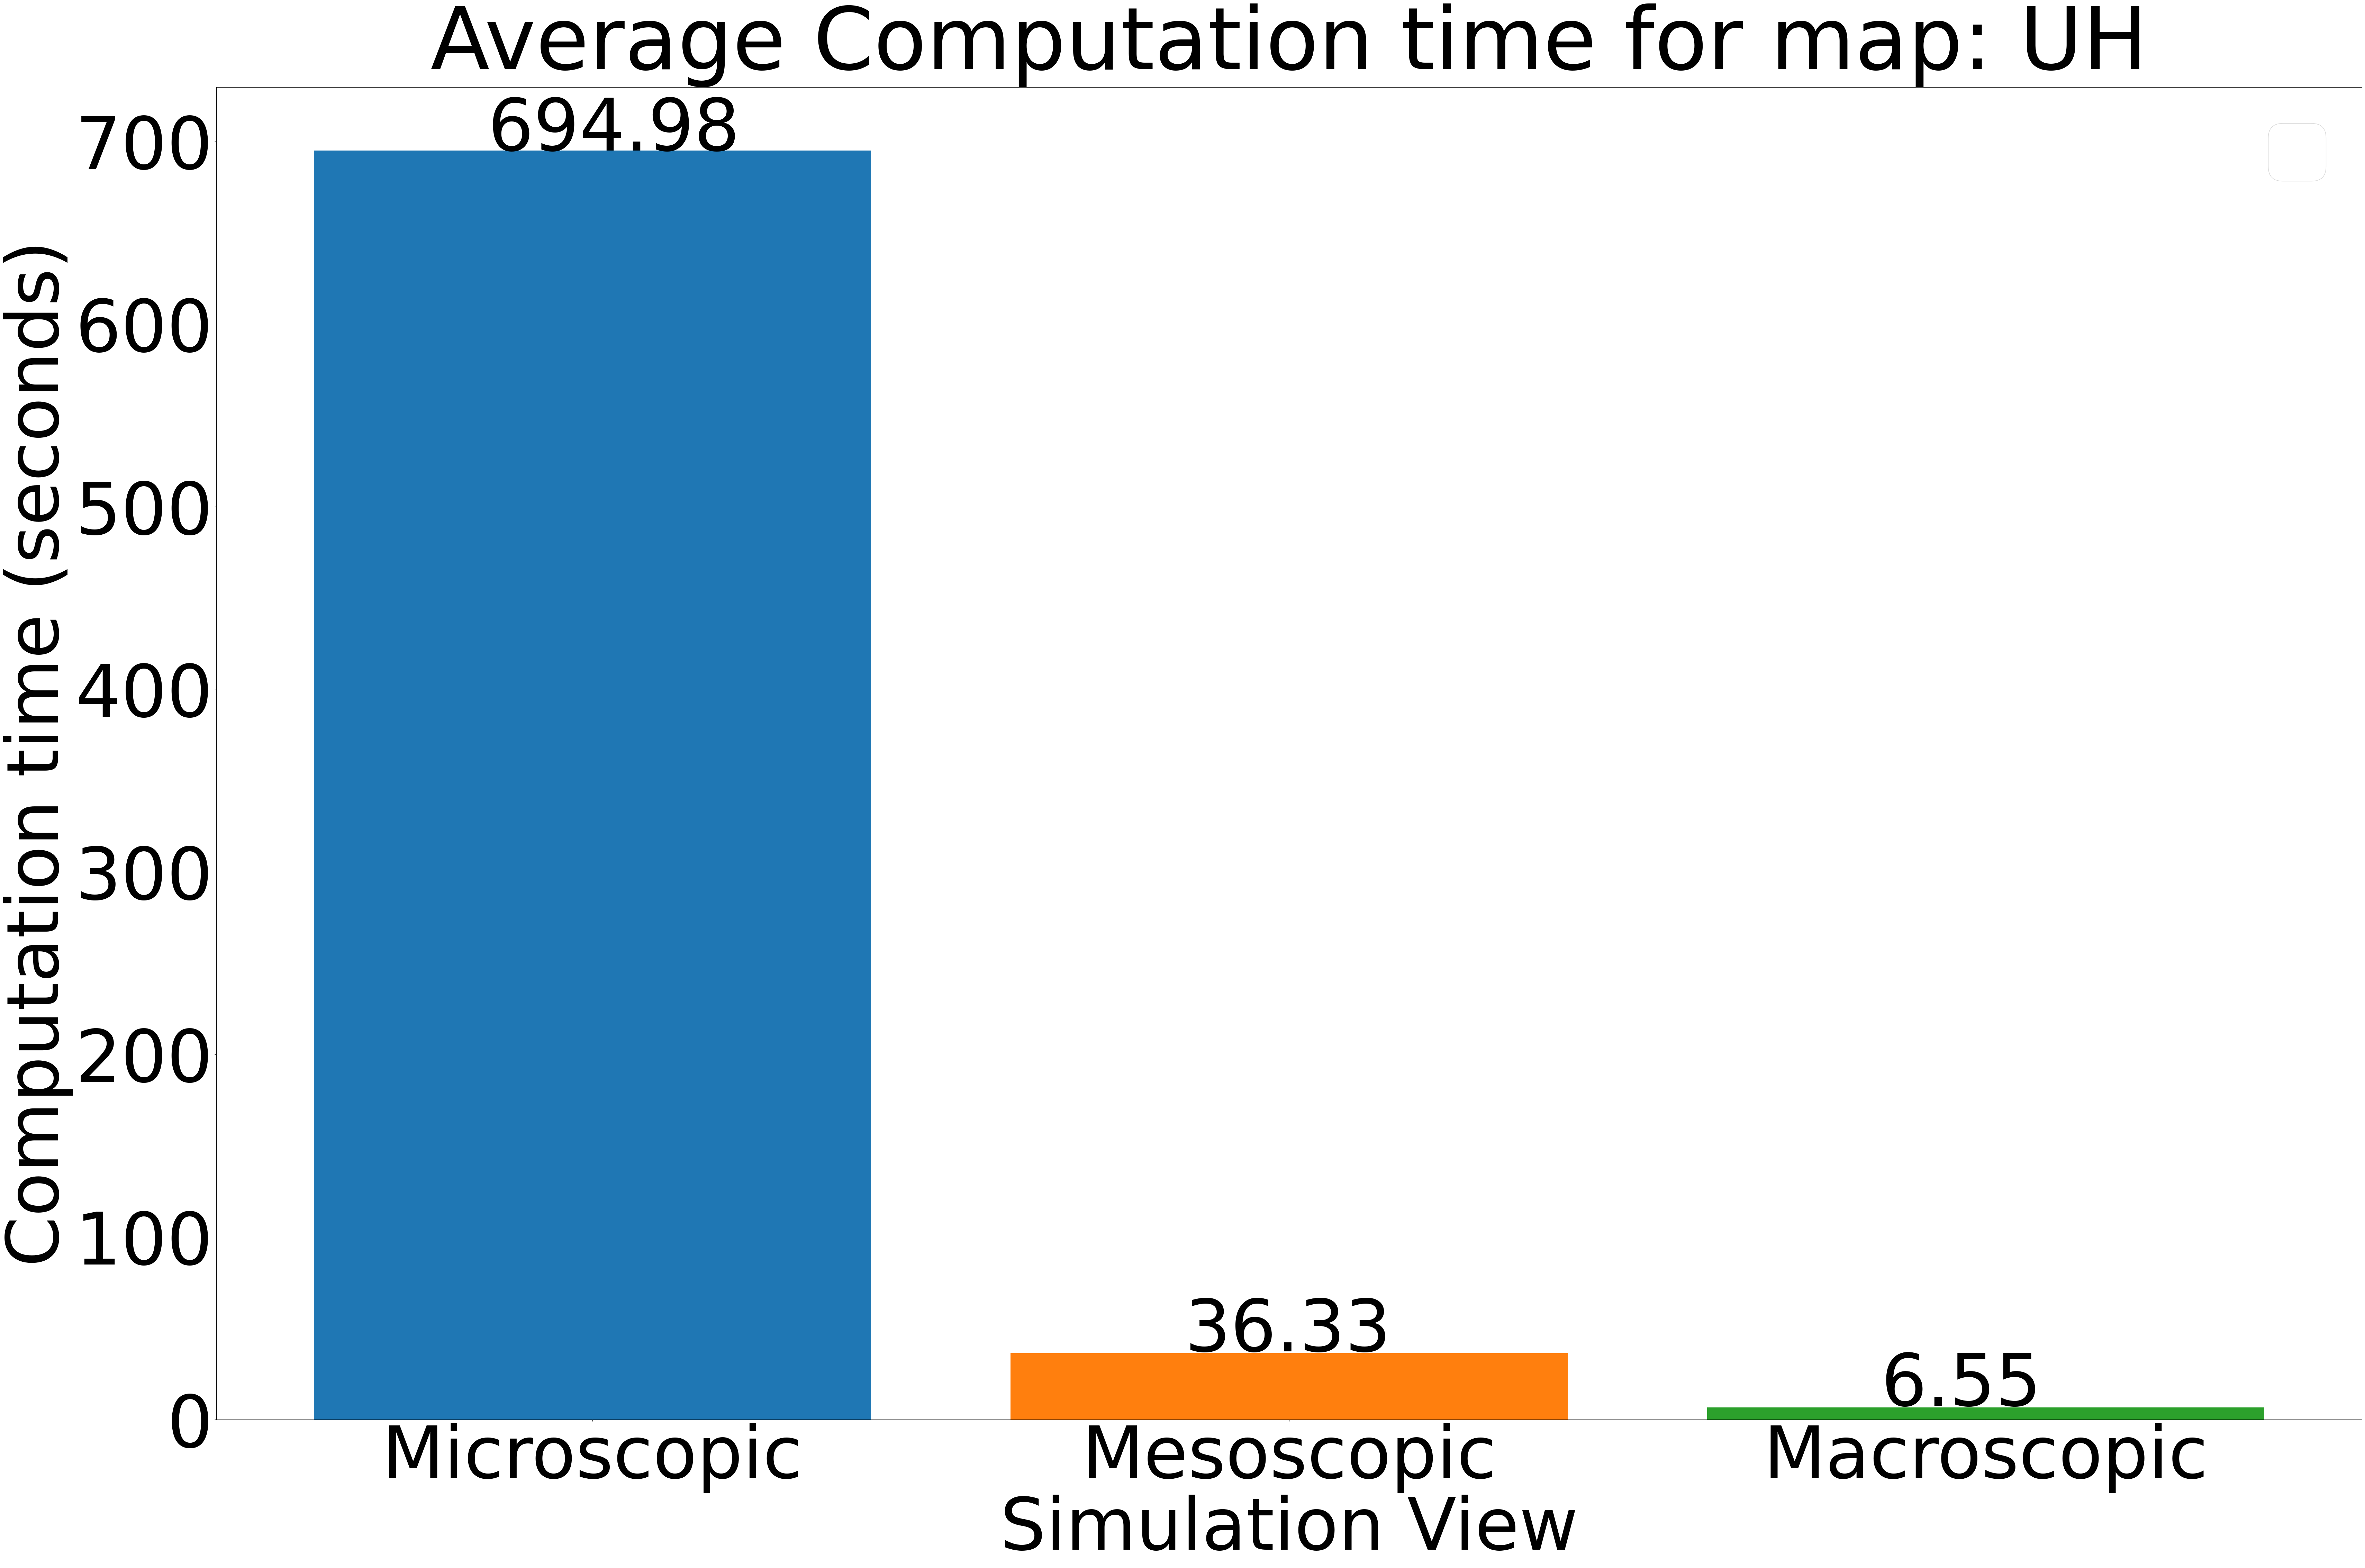

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

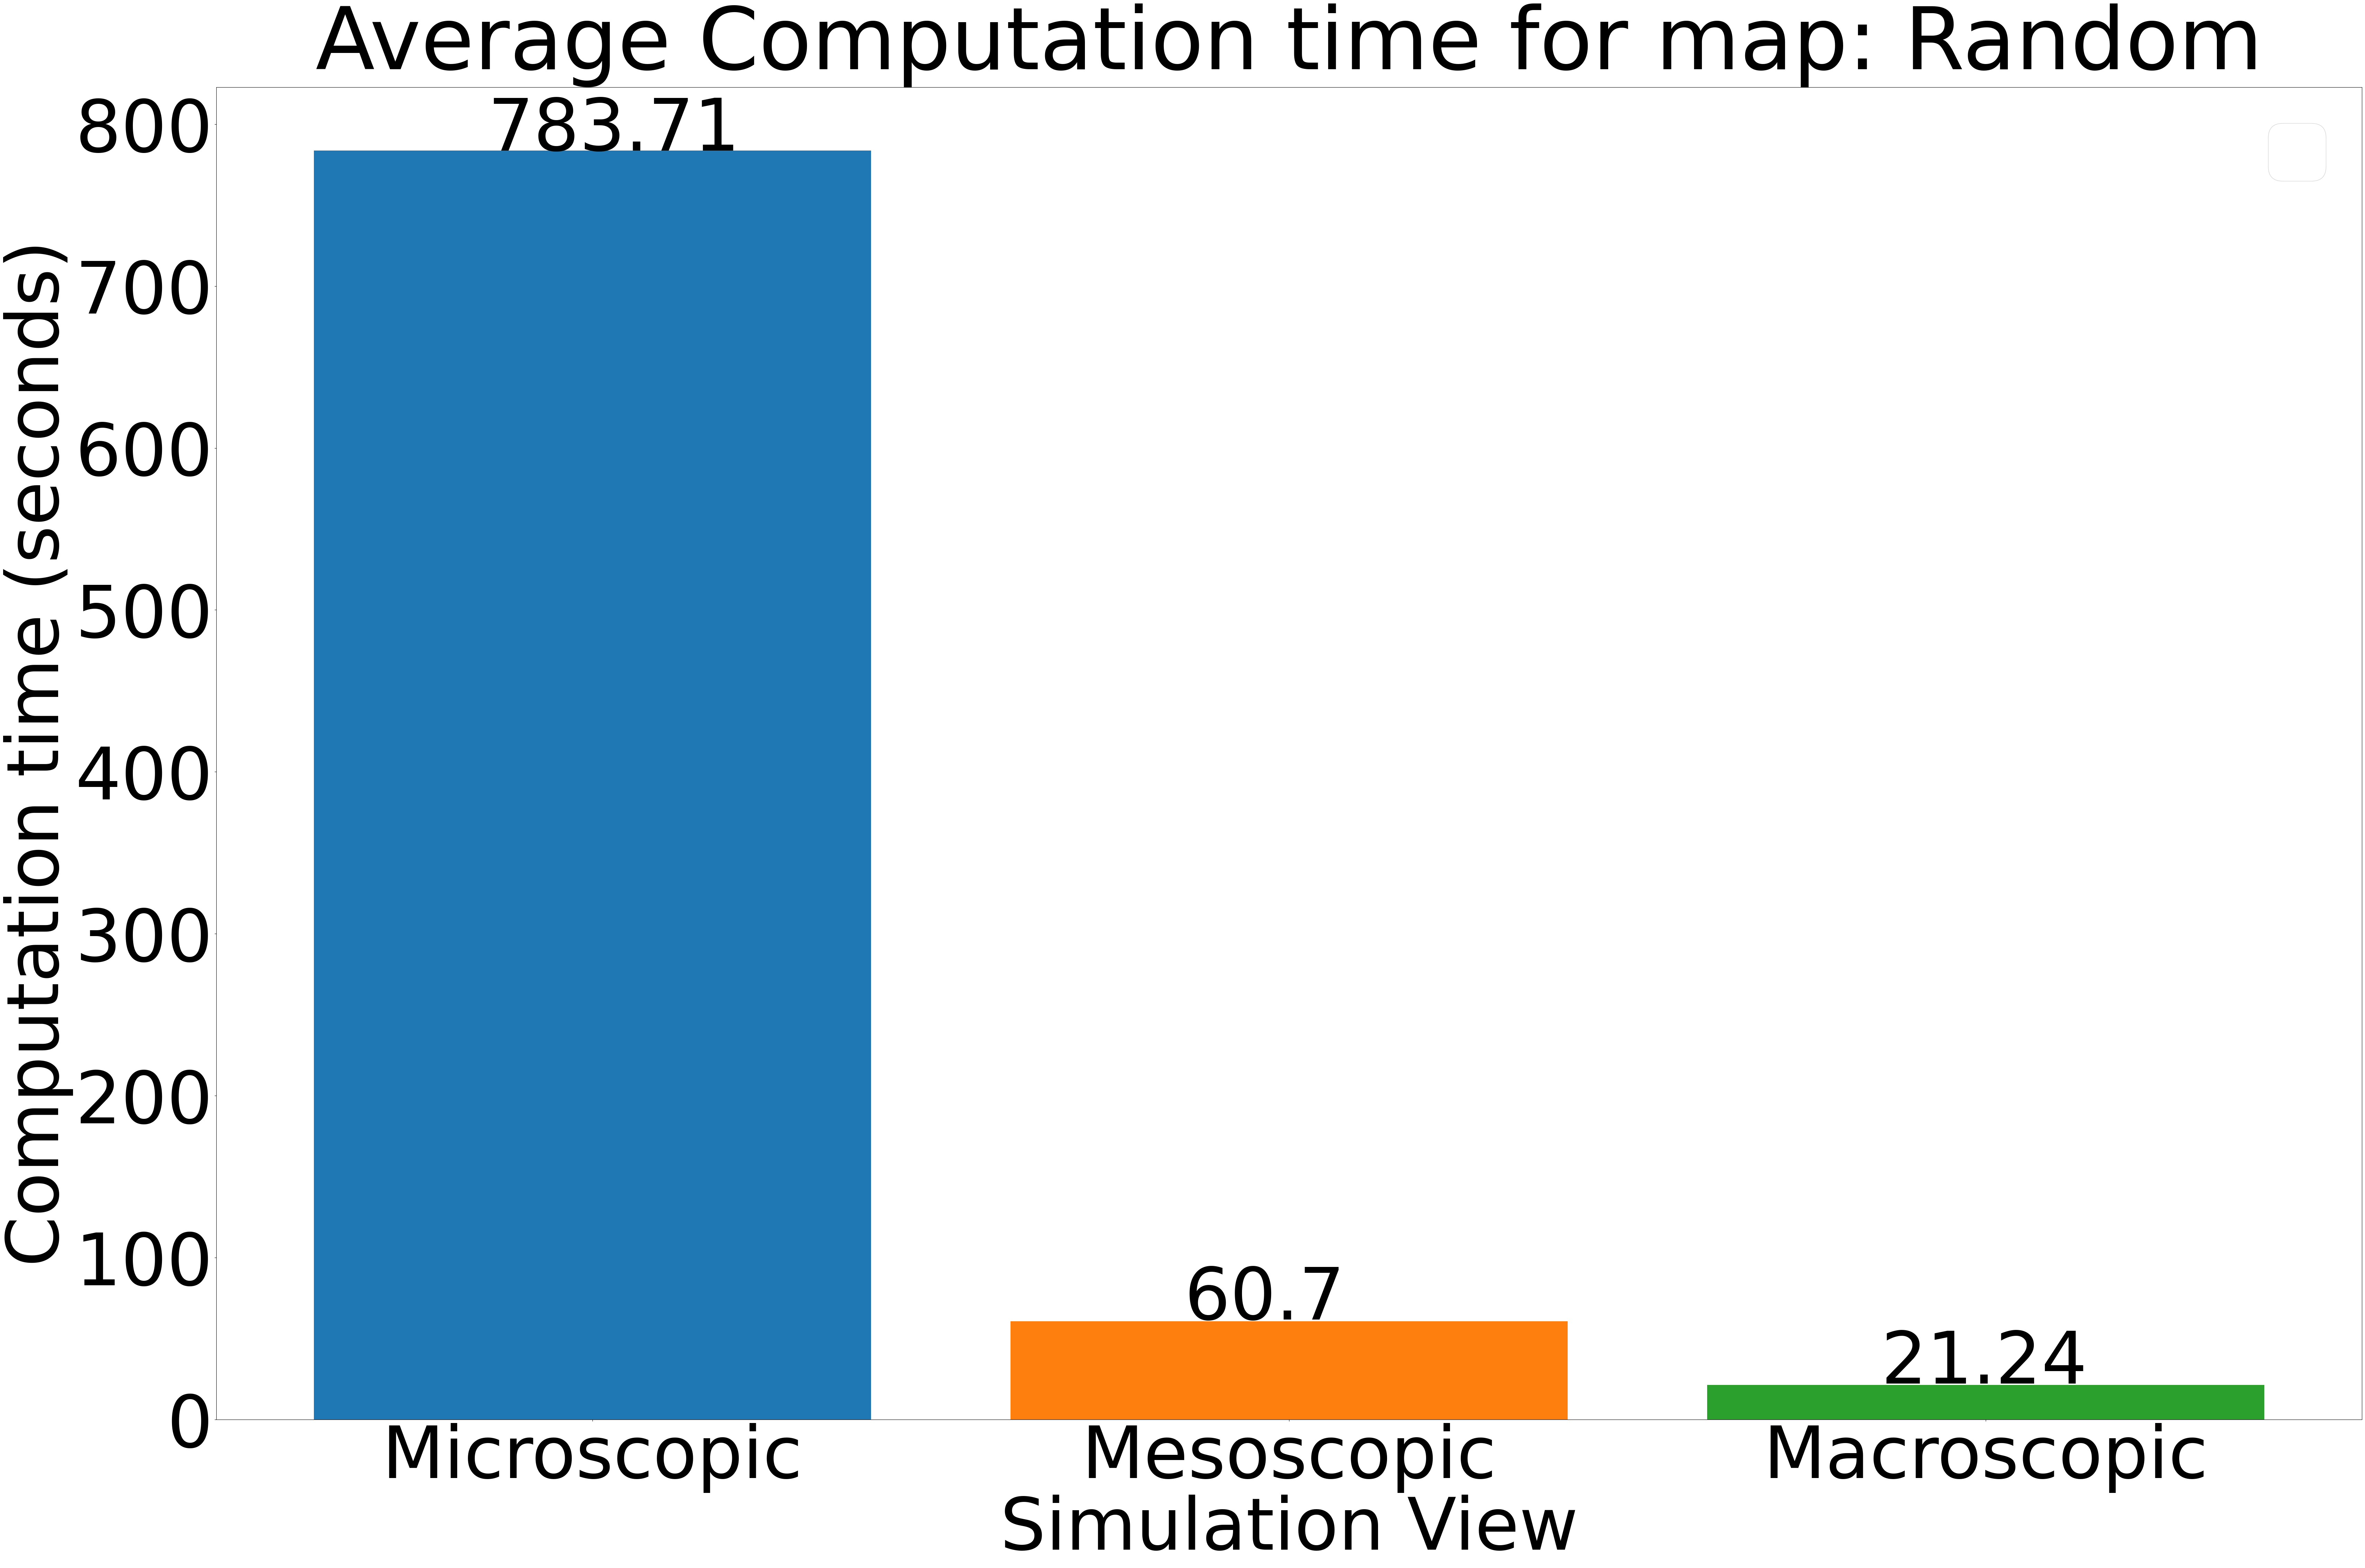

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

<Figure size 8000x5000 with 0 Axes>

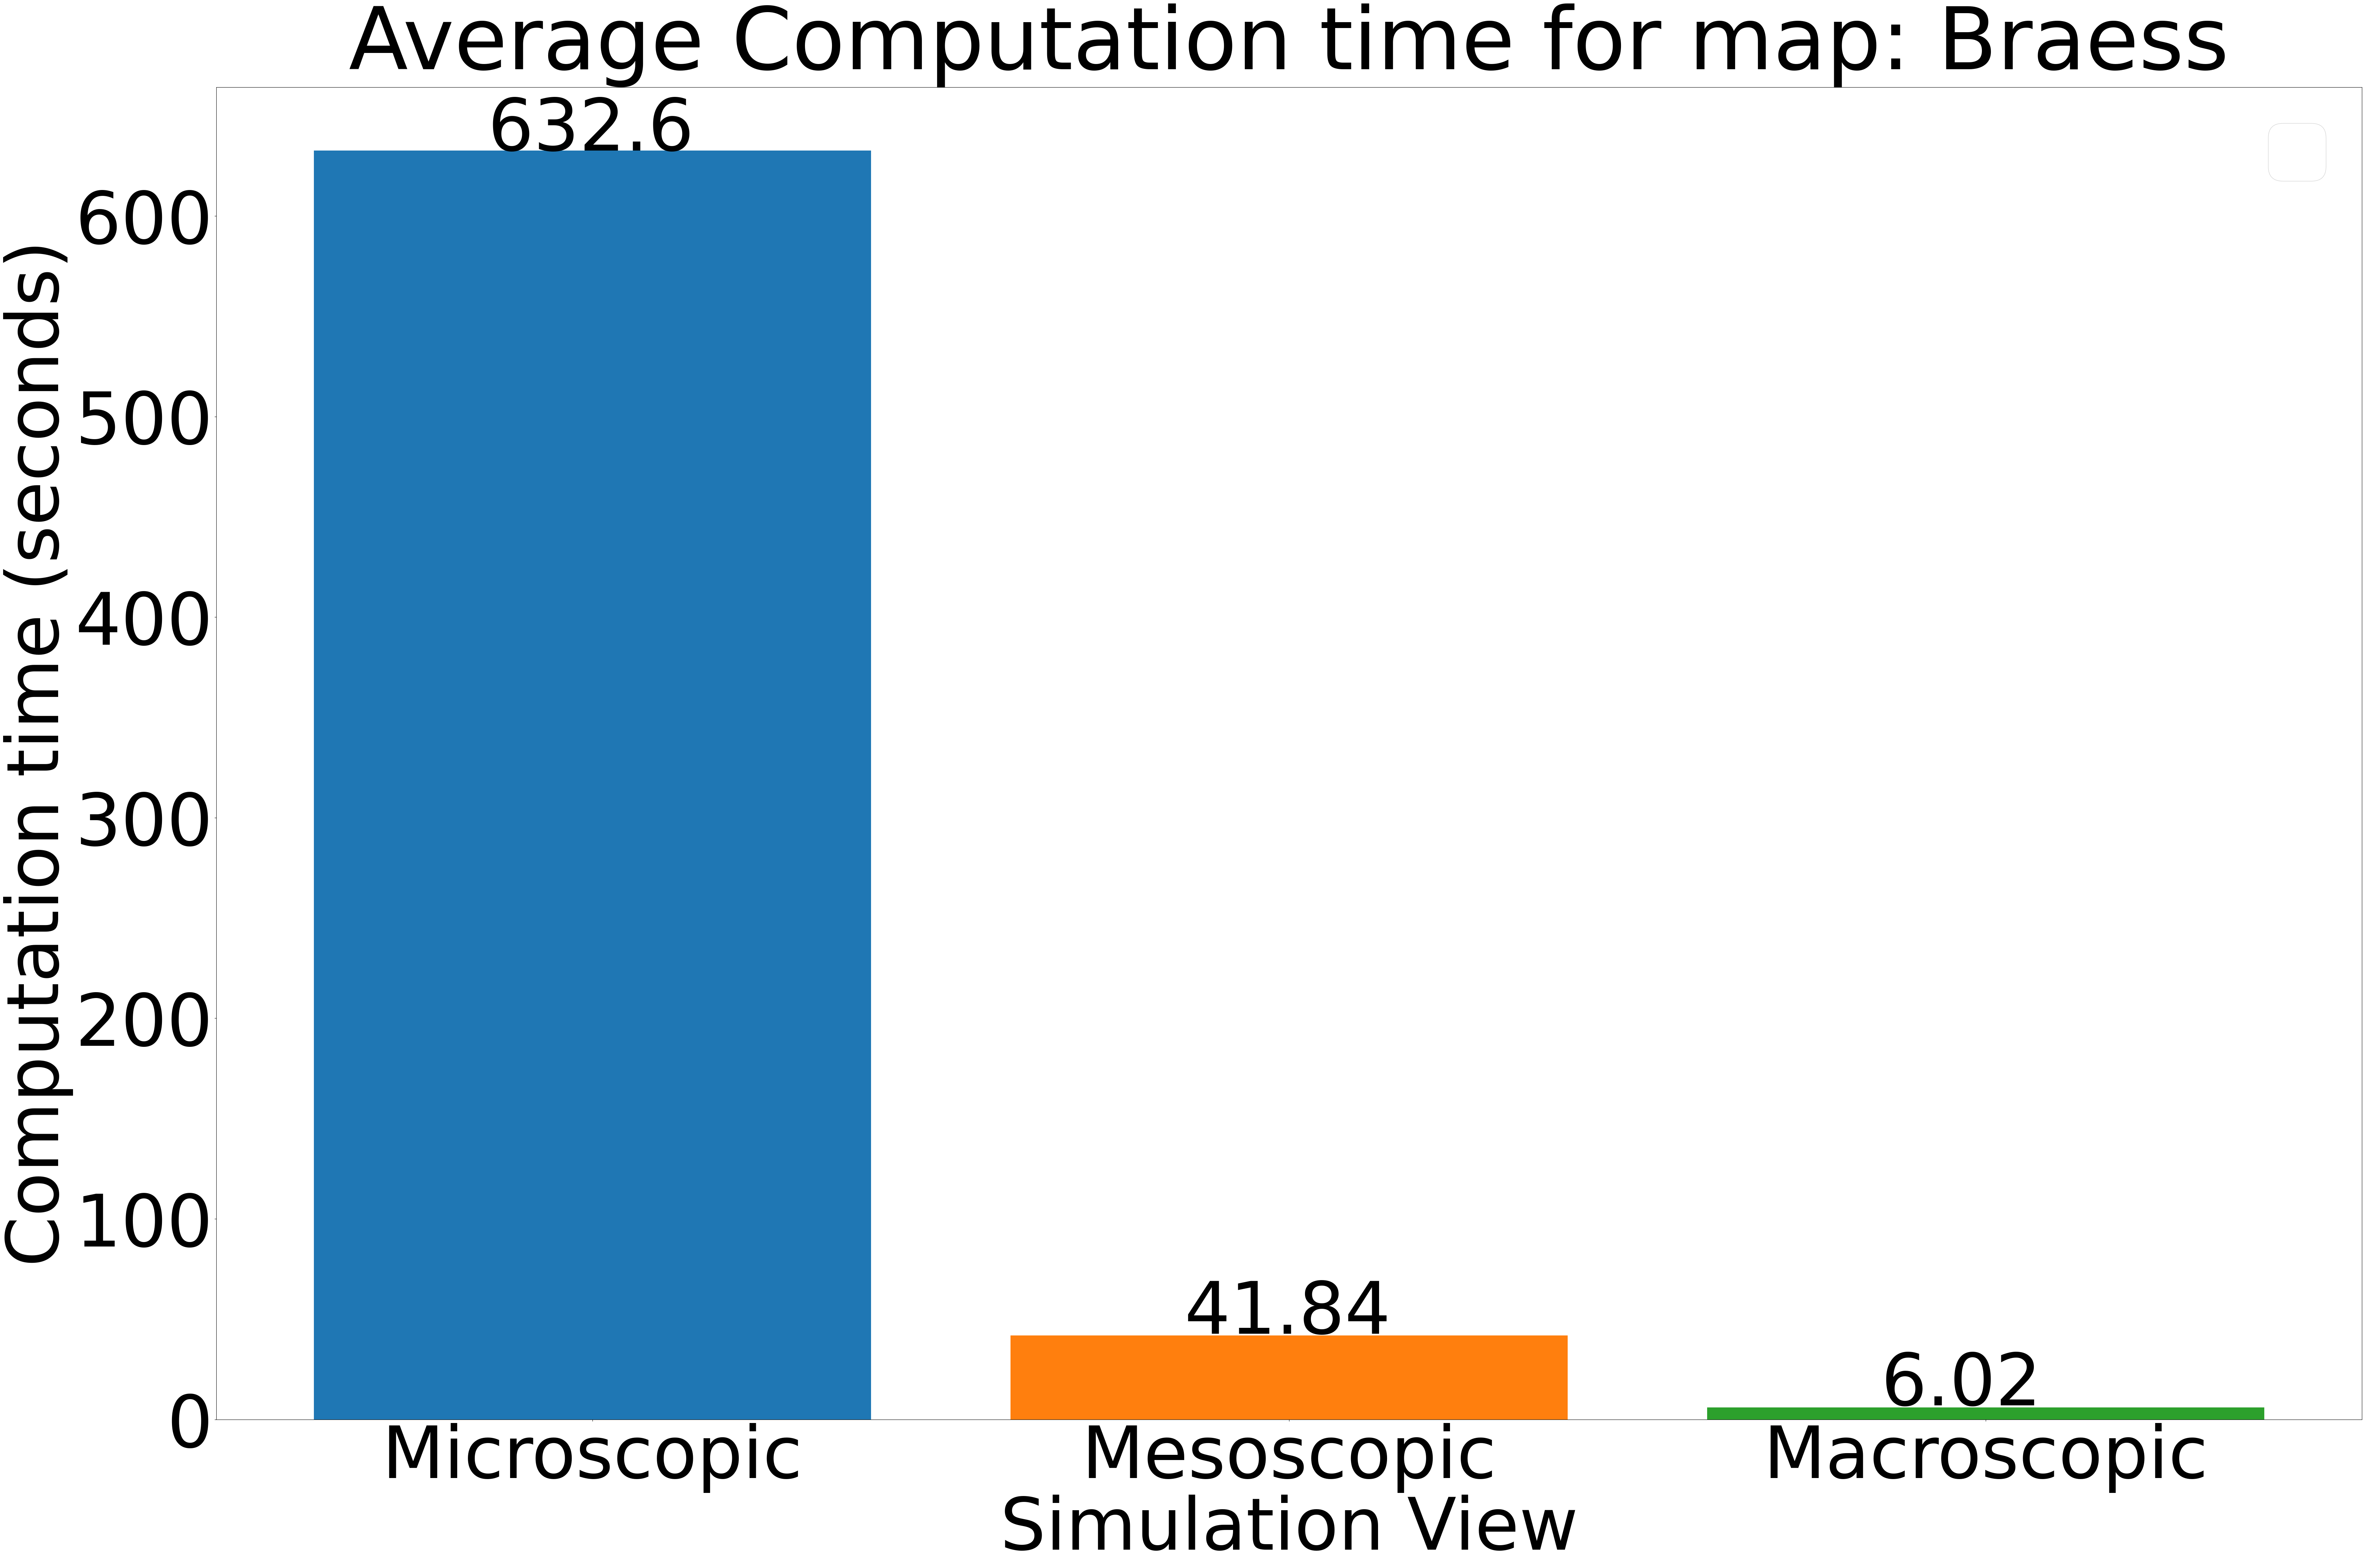

In [67]:
for m in maps.keys():
    base_name=maps[m]
    micro_t = 0
    meso_t = 0
    macro_t = 0
    for x in range(0,5):
        plt.figure(figsize = (80,50))
        plt.rc('font', size=150) 
        #print(Computation_time[m]['Macro'][x])
        micro_t += Computation_time[m]['Micro'][x] 
        meso_t += Computation_time[m]['Meso'][x]
        macro_t += sum(Computation_time[m]['Macro'][x])
    micro_t /= 5
    meso_t /= 5
    macro_t /= 5
    micro_t=round(micro_t,2)
    meso_t=round(meso_t,2)
    macro_t=round(macro_t,2)
    doot = plt.bar(0,micro_t)
    doot = plt.bar(1,meso_t)
    doot = plt.bar(2,macro_t)
    name = ["Microscopic","Mesoscopic","Macroscopic"]
    plt.xlabel('Simulation View')
    plt.ylabel('Computation time (seconds)')
    plt.title('Average Computation time for map: '+m)
    index = np.arange(3)
    plt.xticks(ticks = index,labels = name,)
    plt.text(-.15,micro_t+.1,micro_t)
    plt.text(0.85,meso_t+1,meso_t)
    plt.text(1.85,macro_t+1,macro_t)
    plt.legend()
    plt.show()
